In [0]:
from google.colab import drive
import matplotlib.pyplot as plt

In [0]:
#needs to fix the jpg doesnt work

In [5]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [6]:
!ls /content/gdrive/My\ Drive/Chronic_absenteeism_letter/

 50252756.pdf				     'Chronic Absence.xlsx'
 50353442.pdf				      Chronic_Absenteeism.ipynb
'Chronic Absence - Absence List Import.csv'


# Load the sample Data

In [7]:
import pandas as pd
import glob, os

data_dir= '/content/gdrive/My Drive/Chronic_absenteeism_letter/'
filename = 'Chronic Absence.xlsx'
os.chdir(data_dir)

df=pd.read_excel(filename)

print("Column headings:")
print(df.columns)


Column headings:
Index(['NameOfInstitution', 'StudentUniqueID', 'LastSurname', 'FirstName',
       'GradeLevel', 'NumberOfSchoolTardies', 'NumberOfTotalAbsences',
       'Average Absence'],
      dtype='object')


In [0]:
dname=pd.read_excel(filename, sheet_name='Images  & PrincipalTable')

In [9]:
df.NameOfInstitution.unique()

array(['Prairie', 'Bucktown', 'Distinctive College Prep Harper Woods',
       'Distinctive College Prep Redford', 'West Belden', 'Irving Park'],
      dtype=object)

In [0]:
schoolname = {'Prairie':'CICS Prairie', 'Bucktown':'CICS Bucktown', 'Distinctive College Prep Harper Woods':'DCP Harper Woods',
       'Distinctive College Prep Redford':'DCP Redford', 'West Belden':'CICS West Belden', 'Irving Park':'CICS Irving Park'}

In [0]:
df['NameOfInstitution'] = df['NameOfInstitution'].map(schoolname)

In [0]:
links = dict(zip(dname.Campus, dname.Link))

In [13]:
links

{'CICS Bucktown': 'https://www.cicsbucktown.org/uploads/8/4/9/1/84911918/published/cics-bucktown-horz.png?1531843975',
 'CICS Irving Park': 'https://www.cicsirvingpark.org/uploads/8/4/9/1/84911918/published/cics-irving-park-horz.png?1531844890',
 'CICS Prairie': 'https://www.cicsprairie.org/uploads/8/4/9/1/84911918/published/cics-prairie-horz.png?1531844962',
 'CICS West Belden': 'https://www.cicswestbelden.org/uploads/8/4/9/1/84911918/published/cics-west-belden-horz.png?1531845057',
 'DCP Harper Woods': 'https://drive.google.com/file/d/1rOVmjNbgIf3sWT8lXGa8fvDBsgjSShfr/view?usp=sharing',
 'DCP Redford': 'https://drive.google.com/file/d/1rOVmjNbgIf3sWT8lXGa8fvDBsgjSShfr/view?usp=sharing'}

In [0]:
#Make a dictionary matching the campus to Director names
dnames = dict(zip(dname.Campus, dname.Director))

In [15]:
dnames

{'CICS Bucktown': "Ms. Sarah O'Connell",
 'CICS Irving Park': 'Mr. JW Kuebler',
 'CICS Prairie': 'Ms. Jennifer Harth',
 'CICS West Belden': 'Ms. Colleen Collins',
 'DCP Harper Woods': 'Ms. Cassie Williams',
 'DCP Redford': 'Ms. Camille Hibbler'}

In [16]:
!pip3 install urllib

ERROR: Could not find a version that satisfies the requirement urllib (from versions: none)
ERROR: No matching distribution found for urllib


In [142]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [0]:
#Getting the original cohort's data

%%bigquery --project ds-student-data bdf
SELECT *
FROM `ds-student-data.Distinctive.ChronicAbsence` 


In [168]:
bdf.shape

(2899, 7)

In [184]:
bdf.head()

,NameOfInstitution,StudentUniqueId,GradeLevel,LastSurname,FirstName,NumberOfTotalAbsences,AverageAbsence
0,Distinctive College Prep Harper Woods,50000607,1,Richardson,Karson,2.0,5.1
1,Distinctive College Prep Harper Woods,50000606,1,Richardson,Karter,2.0,5.1
2,Distinctive College Prep Harper Woods,50000865,2,Chatman,Andre,4.0,5.1
3,Distinctive College Prep Harper Woods,50000063,4,Butler,Londyn,0.0,5.1
4,Distinctive College Prep Harper Woods,50000002,3,Carter,London,0.0,5.1


In [170]:
bdf['NumberOfTotalAbsences'].mean()

5.108658157985512

In [0]:
#Use the total number of absences for all schools for schools whose average is above all average
bdf['AverageAbsence'] = bdf['AverageAbsence'].apply(lambda x: 5.1 if x > 5.1 else x)

In [183]:
bdf.tail()

,NameOfInstitution,StudentUniqueId,GradeLevel,LastSurname,FirstName,NumberOfTotalAbsences,AverageAbsence
2894,West Belden,50569118,2,Martinez-Lopez,Alexander,8.0,3.2
2895,West Belden,50335956,4,Munoz,Dylan,8.0,3.2
2896,West Belden,50609712,1,Ramirez Garcia,Amalia,8.0,3.2
2897,West Belden,50515938,3,Sevilla-Morales,Miguel,8.0,3.2
2898,West Belden,50449566,2,Zuniga,Alejandro,8.0,3.2


In [0]:
#Calculated the Peer Average Absences in the same school
#bdf['AverageAbsencePerSchool']=bdf.groupby(['NameOfInstitution'])['NumberOfTotalAbsences'].transform('mean')

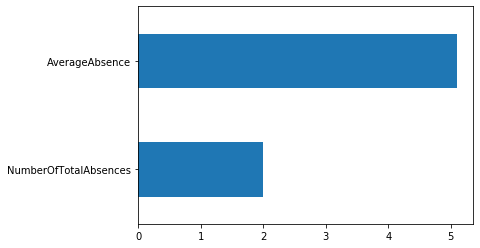

In [185]:
x=bdf.loc[0,'NumberOfTotalAbsences':].plot.barh() 


In [23]:
!pip3 install reportlab

     |████████████████████████████████| 2.6MB 9.0MB/s 


In [0]:
from reportlab.lib import colors
from reportlab.graphics.shapes import Drawing, String
from reportlab.graphics.charts.barcharts import HorizontalBarChart


def make_drawing(row):
    drawing = Drawing()
    data = [(row['NumberOfTotalAbsences'], row['Average Absence']),]
    names = [row['FirstName'], 'Classmates']
    
    bc = HorizontalBarChart()
    bc.x = 20
    bc.y = 50
    bc.height = 150
    bc.width = 400
    bc.data = data
    bc.strokeColor = colors.black
    bc.valueAxis.valueMin = 0
    bc.valueAxis.visibleGrid = True
    bc.valueAxis.valueMax = 70
    bc.valueAxis.valueStep = 10
    
    bc.valueAxis.labels.fontName = 'Times-Roman'
    #bc.valueAxis.labels = [row['NumberOfTotalAbsences'], row['Average Absence']]
    bc.categoryAxis.labels.boxAnchor = 'ne'
    bc.categoryAxis.labels.dx = -10
    bc.categoryAxis.labels.dy = 0 
    bc.categoryAxis.labels.fontName = 'Helvetica'
    bc.categoryAxis.categoryNames = names
    

    #Customize the color of the bars  
    bc.bars[(0, 0)].fillColor = colors.steelblue 
    bc.bars[(0, 1)].fillColor = colors.lightsteelblue
    drawing.add(bc)

    return drawing

In [210]:
for i in range(2):
    build_a_letter(df.loc[i])

AttributeError: ignored

In [0]:
a=[(df.loc[3]['NumberOfTotalAbsences'], df.loc[3]['Average Absence']),]

In [200]:
a[0]

(43, 14.8)

In [0]:
import datetime
from reportlab.lib.enums import TA_JUSTIFY
from reportlab.lib.pagesizes import letter
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image
from reportlab.lib.styles import getSampleStyleSheet, ParagraphStyle
from reportlab.lib.units import inch
from reportlab.platypus import PageBreak
from reportlab.lib.utils import ImageReader
 
def build_a_letter(row):
    '''
    Input: dataframe row
    Output: pdf file named after studentID
    '''

    #I name the pdf name after the StudentID
    name = str(row['StudentUniqueID'])+'.pdf'

    doc = SimpleDocTemplate(name, pagesize=letter,
                        rightMargin=72,leftMargin=72,
                        topMargin=72,bottomMargin=18)
    Story=[]

    #change later for different school
    
    full_name = row['FirstName']+' ' + row['LastSurname']
    school_name = row.NameOfInstitution
    logo = Image(links[school_name])
    formatted_time = datetime.date.today().strftime("%B %d, %Y")
    NumberOfTotalAbsences = str(row.NumberOfTotalAbsences)
    story = []
    #Set the logo 
    Story.append(logo)
     
    styles=getSampleStyleSheet()
    styles.add(ParagraphStyle(name='Justify', alignment=TA_JUSTIFY))
    ptext = '<font size=12>%s</font>' % formatted_time
     
    Story.append(Paragraph(ptext, styles["Normal"]))
    Story.append(Spacer(1, 24))
     
    ptext = '<font size=12>Dear Family of %s: </font>' % (full_name)
    Story.append(Paragraph(ptext, styles["Justify"]))
    ptext = '<font size=12>We are writing to you because <b>our records show \
             that your child has missed more than 10 percent of the school year\
              to date.</b> Please understand that all absences are seen as \
              unexcused until proper documentation is presented in accordance \
              with the school handbook .</font>'
    Story.append(Paragraph(ptext, styles["Justify"]))
    Story.append(Spacer(1, 12))

    ptext = '<font size=12>At %s, <u>we expect all students to attend school on time,\
     every day.</u>  Daily attendance is the first and most important step in ensuring\
      academic success. Our goal is to teach a sense of responsibility among students\
       by holding them accountable for <u>being at school regularly</u>, on time, and for the\
        <u>entire</u> school day. Below, you will see a comparison of how often your child \
        has been absent vs. average days absent for someone in the same grade.</font>' % (school_name)
    Story.append(Paragraph(ptext, styles["Justify"]))
    Story.append(Spacer(1, 12))
     
     
    ptext = '<font size=12>Because we care about your child’s success and well being, \
    we will follow up with you soon by phone.  We will also schedule a time for you to \
    come to school for a meeting, with the goal being to identify the factors contributing\
     to your child’s absenteeism, discuss ways we can improve your child’s attendance this \
     year, and commit to a plan of action together. We value home-school partnerships, and \
     we are eager to work with you to improve your student’s attendance.</font>'
    Story.append(Paragraph(ptext, styles["Justify"]))
    Story.append(Spacer(1, 12))
    ptext = '<font size=12>Please take some time to review our network attendance policy, \
    and reach out if you have questions or require support.  Thank you for your attention \
    to this matter, and thank you in advance for your partnership and a dedication to \
    ensuring that your child is set up for success in school.</font>'
    Story.append(Paragraph(ptext, styles["Justify"]))
    Story.append(Spacer(1, 12))
    ptext = '<font size=12>Sincerely,</font>'
    Story.append(Paragraph(ptext, styles["Normal"]))
    Story.append(Spacer(1, 24))
    ptext = '<font size=12>%s</font>'% (dnames[school_name])
    Story.append(Paragraph(ptext, styles["Normal"]))
    ptext = '<font size=12>Director, %s</font>'% (school_name)
    Story.append(Paragraph(ptext, styles["Normal"]))
    Story.append(PageBreak()) 
    
    #Second page spanish version
    Story.append(logo)
     
    styles=getSampleStyleSheet()
    styles.add(ParagraphStyle(name='Justify', alignment=TA_JUSTIFY))
    ptext = '<font size=12>%s</font>' % formatted_time
     
    Story.append(Paragraph(ptext, styles["Normal"]))
    Story.append(Spacer(1, 12))
     

    ptext = '<font size=12>Dear Family of %s: </font>' % (full_name)
    Story.append(Paragraph(ptext, styles["Justify"]))
    ptext = '<font size=12>We are writing to you because <b>our records show \
             that your child has missed more than 10 percent of the school year\
              to date.</b> Please understand that all absences are seen as \
              unexcused until proper documentation is presented in accordance \
              with the school handbook .</font>'
    Story.append(Paragraph(ptext, styles["Justify"]))
    Story.append(Spacer(1, 12))

    ptext = '<font size=12>At %s, <u>we expect all students to attend school on time,\
     every day.</u>  Daily attendance is the first and most important step in ensuring\
      academic success. Our goal is to teach a sense of responsibility among students\
       by holding them accountable for <u>being at school regularly</u>, on time, and for the\
        <u>entire</u> school day. Below, you will see a comparison of how often your child \
        has been absent vs. average days absent for someone in the same grade.</font>' % (school_name)
    Story.append(Paragraph(ptext, styles["Justify"]))
    Story.append(Spacer(1, 12))
     
     
    ptext = '<font size=12>Because we care about your child’s success and well being, \
    we will follow up with you soon by phone.  We will also schedule a time for you to \
    come to school for a meeting, with the goal being to identify the factors contributing\
     to your child’s absenteeism, discuss ways we can improve your child’s attendance this \
     year, and commit to a plan of action together. We value home-school partnerships, and \
     we are eager to work with you to improve your student’s attendance.</font>'
    Story.append(Paragraph(ptext, styles["Justify"]))
    Story.append(Spacer(1, 12))
    ptext = '<font size=12>Please take some time to review our network attendance policy, \
    and reach out if you have questions or require support.  Thank you for your attention \
    to this matter, and thank you in advance for your partnership and a dedication to \
    ensuring that your child is set up for success in school.</font>'
    Story.append(Paragraph(ptext, styles["Justify"]))
    Story.append(Spacer(1, 12))
    ptext = '<font size=12>Sincerely,</font>'
    Story.append(Paragraph(ptext, styles["Normal"]))
    Story.append(Spacer(1, 24))
    ptext = '<font size=12>%s</font>'% (dnames[school_name])
    Story.append(Paragraph(ptext, styles["Normal"]))
    ptext = '<font size=12>Director, %s</font>'% (school_name)
    Story.append(Paragraph(ptext, styles["Normal"]))
    Story.append(PageBreak()) 

    #Third page barchart
    title_style = styles['Heading1']
    title_style.alignment = 1
    title = Paragraph("Attendance Summary", title_style)
    Story.append(title)
    Story.append(Spacer(1, 24))
    pic = make_drawing(row)
    Story.append(pic)

    doc.build(Story)

In [28]:
df.head()

,NameOfInstitution,StudentUniqueID,LastSurname,FirstName,GradeLevel,NumberOfSchoolTardies,NumberOfTotalAbsences,Average Absence
0,CICS Prairie,50252756,Huizar Perez,Anthony,6,0,66,14.5
1,CICS Bucktown,50353442,Turner,Aiden,4,0,51,12.3
2,DCP Harper Woods,50000275,Smith,Paris,3,15,44,14.8
3,DCP Harper Woods,50000072,Phillips,Brandon,4,14,43,14.8
4,DCP Redford,2018249,Goforth,Brian,2,4,41,16.2
